In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
cols = [
    "Start_Time", "Severity", "Weather_Condition",
    "Start_Lat", "Start_Lng",
    "Temperature(F)", "Visibility(mi)",
    "Wind_Speed(mph)", "City", "State"
]

df = pd.read_csv("US_Accidents_March23.csv", usecols=cols)
df.head()

,Severity,Start_Time,Start_Lat,Start_Lng,City,State,Temperature(F),Visibility(mi),Wind_Speed(mph),Weather_Condition
0,3,2016-02-08 05:46:00,39.865147,-84.058723,Dayton,OH,36.9,10.0,NaN,Light Rain
1,2,2016-02-08 06:07:59,39.928059,-82.831184,Reynoldsburg,OH,37.9,10.0,NaN,Light Rain
2,2,2016-02-08 06:49:27,39.063148,-84.032608,Williamsburg,OH,36.0,10.0,3.5,Overcast
3,3,2016-02-08 07:23:34,39.747753,-84.205582,Dayton,OH,35.1,9.0,4.6,Mostly Cloudy
4,2,2016-02-08 07:39:07,39.627781,-84.188354,Dayton,OH,36.0,6.0,3.5,Mostly Cloudy


In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Severity           int64  
 1   Start_Time         object 
 2   Start_Lat          float64
 3   Start_Lng          float64
 4   City               object 
 5   State              object 
 6   Temperature(F)     float64
 7   Visibility(mi)     float64
 8   Wind_Speed(mph)    float64
 9   Weather_Condition  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 589.6+ MB


Severity                  0
Start_Time                0
Start_Lat                 0
Start_Lng                 0
City                    253
State                     0
Temperature(F)       163853
Visibility(mi)       177098
Wind_Speed(mph)      571233
Weather_Condition    173459
dtype: int64

In [7]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"], errors="coerce")

In [8]:
df["Hour"] = df["Start_Time"].dt.hour
df["Day"] = df["Start_Time"].dt.day_name()

In [10]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"], format="ISO8601")

In [11]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"], errors="coerce")
df = df.dropna(subset=["Start_Time"])


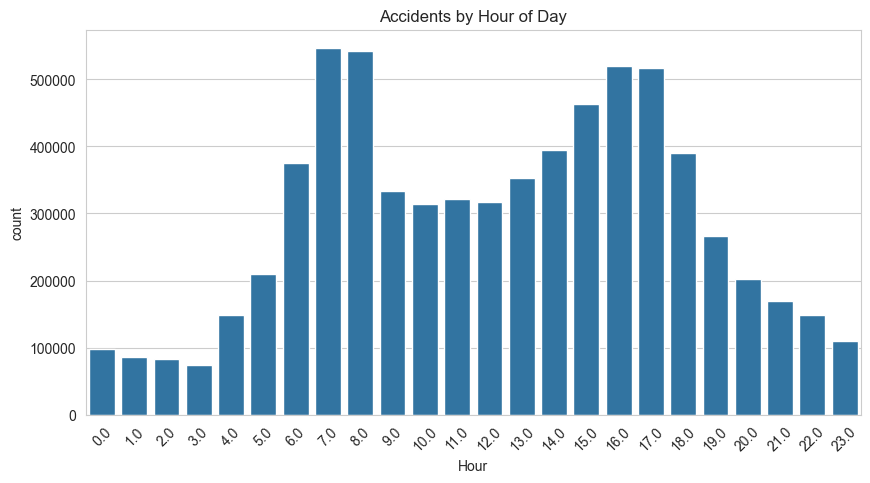

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x="Hour", data=df)
plt.title("Accidents by Hour of Day")
plt.xticks(rotation=45)
plt.show()

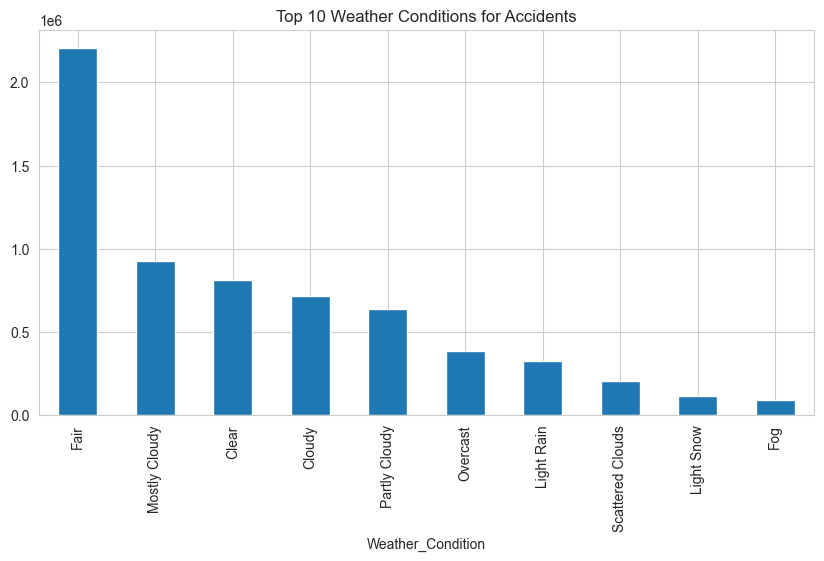

In [14]:
top_weather = df["Weather_Condition"].value_counts().head(10)

plt.figure(figsize=(10,5))
top_weather.plot(kind="bar")
plt.title("Top 10 Weather Conditions for Accidents")
plt.show()


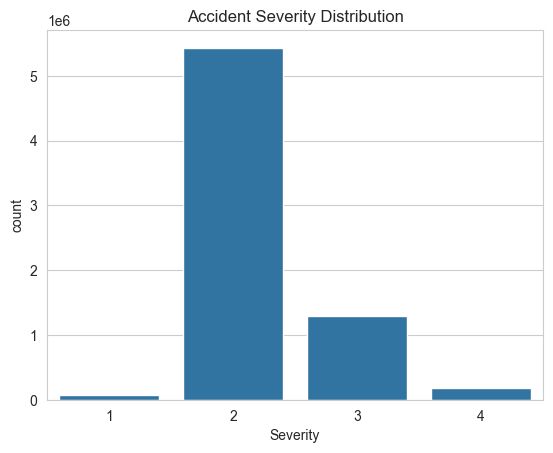

In [15]:
sns.countplot(x="Severity", data=df)
plt.title("Accident Severity Distribution")
plt.show()

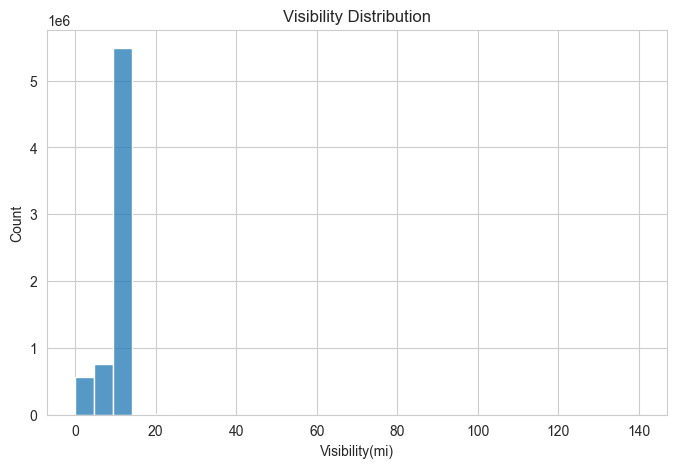

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df["Visibility(mi)"].dropna(), bins=30)
plt.title("Visibility Distribution")
plt.show()


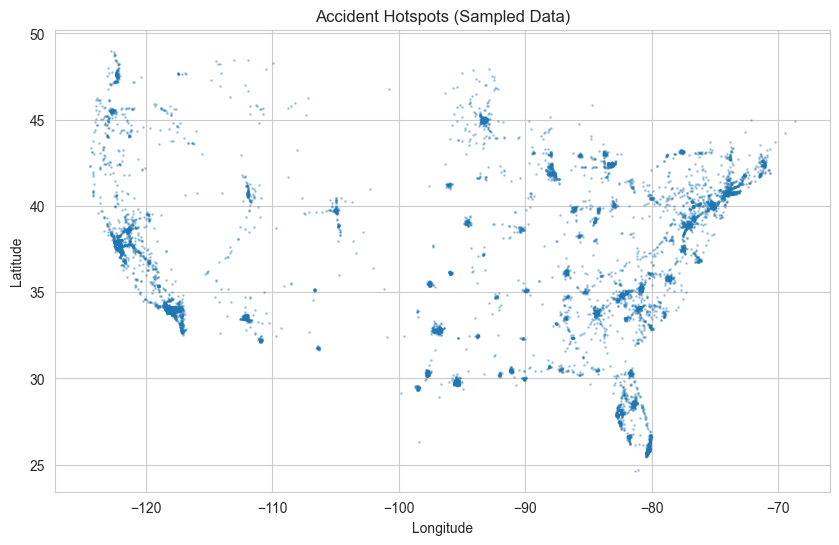

In [17]:
sample_df = df.sample(10000)  # sample for performance

plt.figure(figsize=(10,6))
plt.scatter(sample_df["Start_Lng"], sample_df["Start_Lat"], 
            alpha=0.3, s=1)
plt.title("Accident Hotspots (Sampled Data)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()